<p style = "font-size : 50px; color : #532e1c ; font-family : 'Comic Sans MS'; text-align : center; background-color : #bedcfa; border-radius: 5px 5px;"><strong>Time Series Analysis</strong></p>


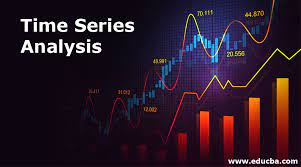

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing dataset
global_temp = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#datatypes of data
global_temp.dtypes

dt                                            object
LandAverageTemperature                       float64
LandAverageTemperatureUncertainty            float64
LandMaxTemperature                           float64
LandMaxTemperatureUncertainty                float64
LandMinTemperature                           float64
LandMinTemperatureUncertainty                float64
LandAndOceanAverageTemperature               float64
LandAndOceanAverageTemperatureUncertainty    float64
dtype: object

In [4]:
global_temp.shape

(3192, 9)

In [5]:
#information about the dataset
global_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [6]:
#description about the dataset
global_temp.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


### Checking the null values

In [7]:
global_temp.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

<AxesSubplot:>

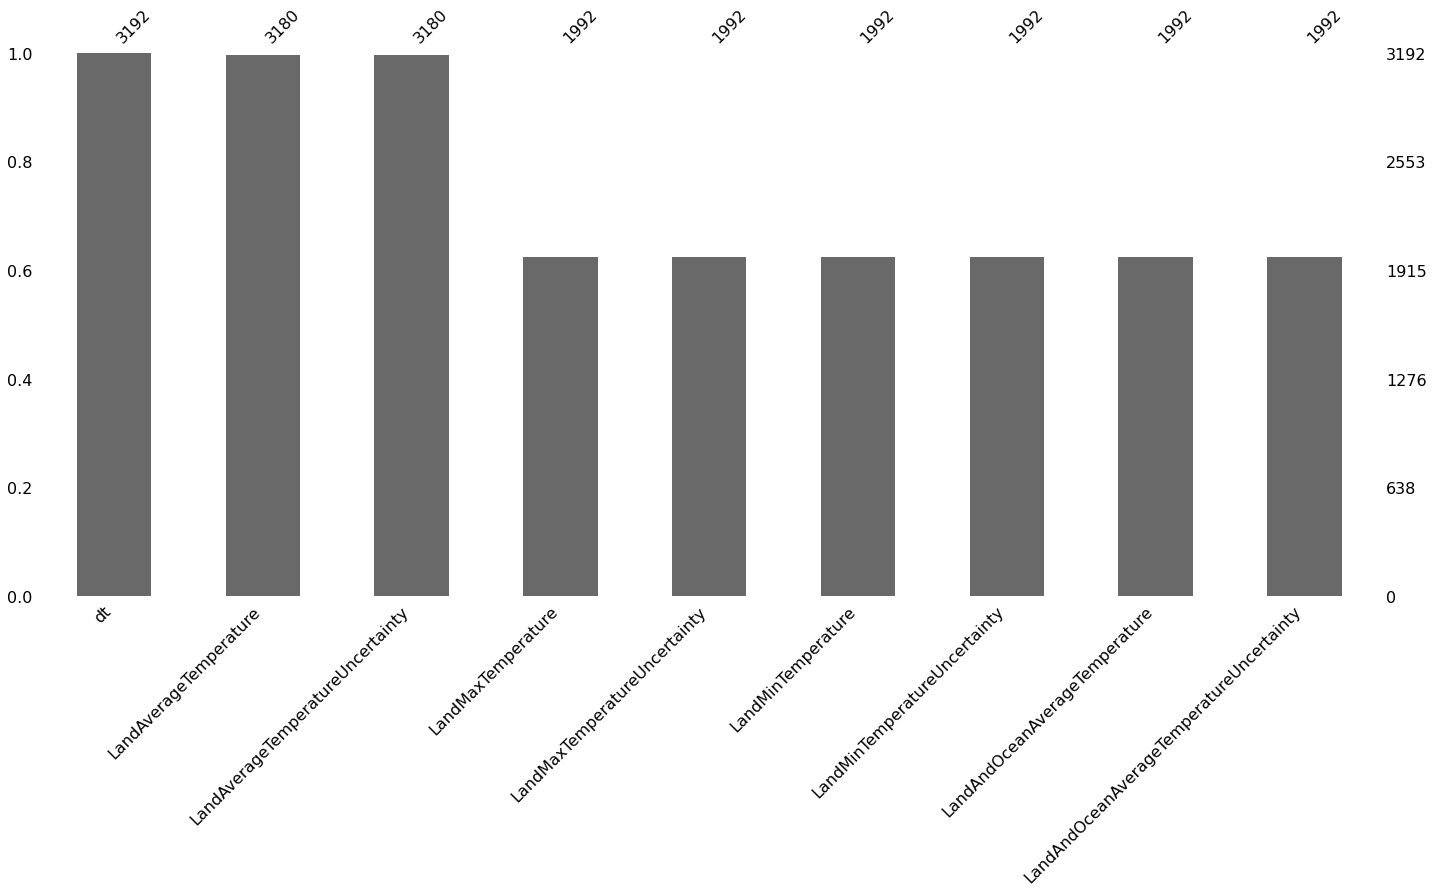

In [8]:
import missingno as msno
msno.bar(global_temp)

# Exploratory Data Analysis


### Is there any global warming wrt year?

Firstly,we seprate the year from the date column

In [9]:
global_temp['dt'][0].split('-')[0]

'1750'

In [10]:
def fetch_year(date):
    return date.split('-')[0]

In [11]:
global_temp['years']=global_temp['dt'].apply(fetch_year)

In [12]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750


We group the data by years to get more meaningful insights.

In [13]:
data=global_temp.groupby('years').agg({'LandAverageTemperature':'mean','LandAverageTemperatureUncertainty':'mean'}).reset_index()

In [14]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty
0,1750,8.719364,2.637818
1,1751,7.976143,2.781143
2,1752,5.779833,2.977000
3,1753,8.388083,3.176000
4,1754,8.469333,3.494250


In [15]:
data['Uncertainity_top']= data['LandAverageTemperature'] + data['LandAverageTemperatureUncertainty']
data['Uncertainity_bottom']= data['LandAverageTemperature'] - data['LandAverageTemperatureUncertainty']

In [16]:
data.head()

,years,LandAverageTemperature,LandAverageTemperatureUncertainty,Uncertainity_top,Uncertainity_bottom
0,1750,8.719364,2.637818,11.357182,6.081545
1,1751,7.976143,2.781143,10.757286,5.195000
2,1752,5.779833,2.977000,8.756833,2.802833
3,1753,8.388083,3.176000,11.564083,5.212083
4,1754,8.469333,3.494250,11.963583,4.975083


In [17]:
data.columns

Index(['years', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'Uncertainity_top', 'Uncertainity_bottom'],
      dtype='object')

In [18]:
fig = px.line(data,x='years',y=['LandAverageTemperature','Uncertainity_top', 'Uncertainity_bottom'],title='Average land temperature in World')
fig.show()

### From this we conclude,Global warming increases in the last decades,as average temperature is more .

### Explore average temperature in each season

In [19]:
global_temp['dt']=pd.to_datetime(global_temp['dt'])

In [20]:
global_temp.dtypes

dt                                           datetime64[ns]
LandAverageTemperature                              float64
LandAverageTemperatureUncertainty                   float64
LandMaxTemperature                                  float64
LandMaxTemperatureUncertainty                       float64
LandMinTemperature                                  float64
LandMinTemperatureUncertainty                       float64
LandAndOceanAverageTemperature                      float64
LandAndOceanAverageTemperatureUncertainty           float64
years                                                object
dtype: object

In [21]:
global_temp['month']=global_temp['dt'].dt.month

In [22]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5


### finding the season

In [23]:
def get_season(month):
    if month>=3 and month<=5:
        return 'spring'
    elif month>=6 and month<=8:
        return 'summer'
    elif month>=9 and month<=11:
        return 'autumn'
    else:
        return 'winter'

In [24]:
global_temp['season']=global_temp['month'].apply(get_season)

In [25]:
global_temp.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,years,month,season
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN,1750,1,winter
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN,1750,2,winter
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN,1750,3,spring
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN,1750,4,spring
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN,1750,5,spring


In [26]:
years=global_temp['years'].unique()

In [27]:
spring_temp = []
summer_temp = []
autumn_temp = []
winter_temp = []
for year in years:
    current_df=global_temp[global_temp['years'] == year]
    spring_temp.append(current_df[current_df['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temp.append(current_df[current_df['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temp.append(current_df[current_df['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temp.append(current_df[current_df['season'] == 'winter']['LandAverageTemperature'].mean())
    

In [28]:
season = pd.DataFrame()

In [29]:
season['year'] = years
season['spring_temp'] = spring_temp
season['summer_temp'] = summer_temp
season['autumn_temp'] = autumn_temp
season['winter_temp'] = winter_temp

In [30]:
season.head()

,year,spring_temp,summer_temp,autumn_temp,winter_temp
0,1750,8.563000,14.518333,8.890000,2.963000
1,1751,6.735000,14.116000,10.673000,1.729000
2,1752,7.035500,NaN,7.587000,2.717000
3,1753,8.627333,14.608333,9.212333,1.104333
4,1754,9.074333,14.208333,8.957333,1.637333


In [31]:
fig=px.line(season,y=['spring_temp','summer_temp','autumn_temp','winter_temp'],title='Avg.temperature in each season')
fig.show()

### Season wise it's get warmer.

# Data Preprocessing


In [32]:
df=pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')

In [33]:
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [34]:
usa=df[df['Country']=='United States']

In [35]:
data=['New York','Los Angeles','San Francisco']

In [36]:
data2=usa[usa['City'].isin(data)]
data2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
4356748,1849-01-01,8.819,2.558,Los Angeles,United States,34.56N,118.70W
4356749,1849-02-01,9.577,1.970,Los Angeles,United States,34.56N,118.70W
4356750,1849-03-01,11.814,2.173,Los Angeles,United States,34.56N,118.70W
4356751,1849-04-01,13.704,2.902,Los Angeles,United States,34.56N,118.70W
4356752,1849-05-01,14.834,2.017,Los Angeles,United States,34.56N,118.70W


In [37]:
data2=data2[['dt','AverageTemperature']]
data2.head()

,dt,AverageTemperature
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [38]:
data2.columns=['Date','Temp']
data2.head()

,Date,Temp
4356748,1849-01-01,8.819
4356749,1849-02-01,9.577
4356750,1849-03-01,11.814
4356751,1849-04-01,13.704
4356752,1849-05-01,14.834


In [39]:
data2['Date']=pd.to_datetime(data2['Date'])

In [40]:
data2.isnull().sum()

Date      0
Temp    120
dtype: int64

In [41]:
data2.dropna(inplace=True)

In [42]:
data2.shape

(7073, 2)

In [43]:
data2.set_index('Date',inplace=True)

### Whether it is stationary or not:
## Conditions:
### 1.Time series should have a constant mean.
### 2.Time series should have a constant standard deviation.
### 3.Time series’s auto-covariance should not depend on time.



<AxesSubplot:xlabel='Date', ylabel='Temp'>

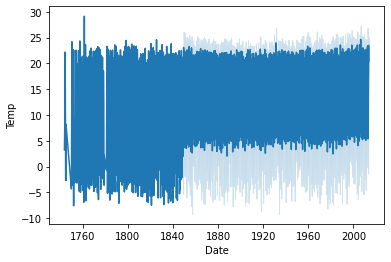

In [44]:
sns.lineplot(x=data2.index,y=data2['Temp'])

In [45]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


### To check we use:
1.Rolling Statistics: Rolling statistics is a visualization technique, in which you plot the moving average to see if it varies over time.

2.ADCF Test: ADCF stands for Augmented Dickey-Fuller test which is a statistical unit root test. It gives us various values which can help us   identifying stationarity. It comprises Test Statistics & some critical values for some confidence levels. If the Test statistics is less than the critical values, we can reject the null hypothesis & say that the series is stationary. The Null hypothesis says that time series is non-stationary.
THE ADCF test also gives us a p-value. According to the null hypothesis, lower values of p is better.

In [46]:
from statsmodels.tsa.stattools import adfuller
test_result=adfuller(data2['Temp'])

In [47]:
def adfuller_test(temp):
    result=adfuller(temp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [48]:
adfuller_test(data2['Temp'])

ADF Test Statistic : -2.006389303675813
p-value : 0.2837786583333184
#Lags Used : 35
Number of Observations Used : 7037
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [49]:
df=data2.copy()

In [50]:
df.head()

,Temp
Date,
1849-01-01,8.819
1849-02-01,9.577
1849-03-01,11.814
1849-04-01,13.704
1849-05-01,14.834


In [51]:
df['First_temp_diff']=df['Temp']-df['Temp'].shift(12)

In [52]:
df.head()

,Temp,First_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [53]:
adfuller_test(df['First_temp_diff'].dropna())

ADF Test Statistic : -21.239650404910915
p-value : 0.0
#Lags Used : 35
Number of Observations Used : 7025
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Date'>

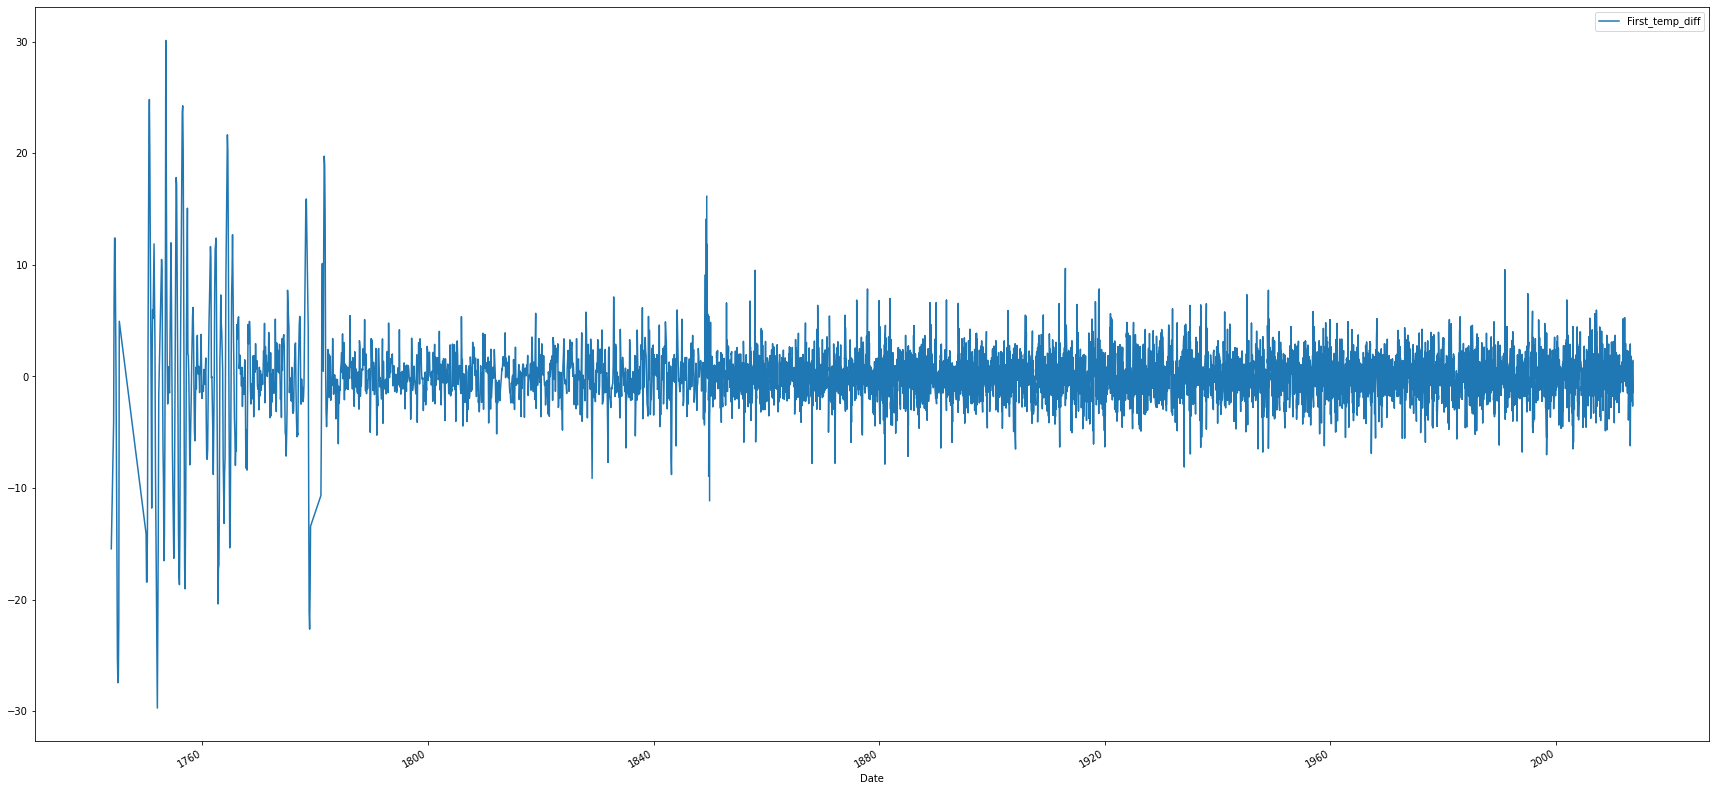

In [54]:
df[['First_temp_diff']].plot(figsize=(30,15))

### Examine if there is a seasonality factor in data or not?

In [55]:
data2['month']=data2.index.month

In [56]:
data2['year']=data2.index.year

In [57]:
data2.head()

,Temp,month,year
Date,,,
1849-01-01,8.819,1,1849
1849-02-01,9.577,2,1849
1849-03-01,11.814,3,1849
1849-04-01,13.704,4,1849
1849-05-01,14.834,5,1849


In [58]:
pivot = data2.pivot_table(values='Temp',index='month',columns='year')

In [59]:
pivot

year,1743,1744,1745,1750,1751,1752,1753,1754,1755,1756,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
month,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,-2.363,-4.310,-3.591,-7.588,-3.122,-2.252,-3.193,-1.985,...,4.080333,4.923000,7.135333,5.656000,5.216333,5.550333,5.776667,5.109333,7.177667,5.388333
2,NaN,NaN,-2.671,-2.719,-2.051,NaN,-1.467,-2.583,-1.802,0.259,...,6.100000,7.297000,7.547667,5.634000,6.754333,6.540667,6.788000,5.777333,7.970000,6.222667
3,NaN,NaN,1.363,2.773,3.256,3.322,4.207,2.728,1.112,NaN,...,12.184000,9.124667,7.527333,10.586000,9.733667,9.211000,10.486667,9.115000,10.604333,10.162333
4,NaN,9.788,8.209,8.848,7.992,7.402,8.099,NaN,8.714,NaN,...,13.806333,12.546000,12.051667,12.342000,13.113000,12.744000,12.254000,12.710000,13.075000,13.880000
5,NaN,15.708,NaN,15.411,NaN,NaN,15.330,NaN,15.238,NaN,...,17.817333,15.982333,17.123333,17.150000,15.800333,17.565667,15.856333,15.724000,17.670333,17.335333
6,NaN,21.210,NaN,19.017,20.724,NaN,20.820,20.075,19.964,20.488,...,19.872000,19.775333,21.395333,20.514333,21.474667,18.941667,20.436667,19.305000,19.904333,21.028333
7,NaN,22.207,NaN,24.203,22.668,NaN,22.524,22.503,NaN,22.452,...,22.246333,23.611667,24.655333,22.628333,23.020000,22.247667,22.538667,22.733333,22.654000,23.489667
8,NaN,NaN,NaN,22.135,21.547,NaN,21.324,21.461,NaN,21.208,...,22.101333,23.028333,21.920333,22.690000,22.305333,22.578000,21.665333,22.028667,23.384667,21.654667
9,NaN,14.922,NaN,17.445,15.812,NaN,15.548,16.281,16.137,17.345,...,20.669333,19.427667,19.365333,19.559000,20.686667,20.752667,20.537333,20.856333,20.655667,20.393333


Text(0, 0.5, 'Temperature')

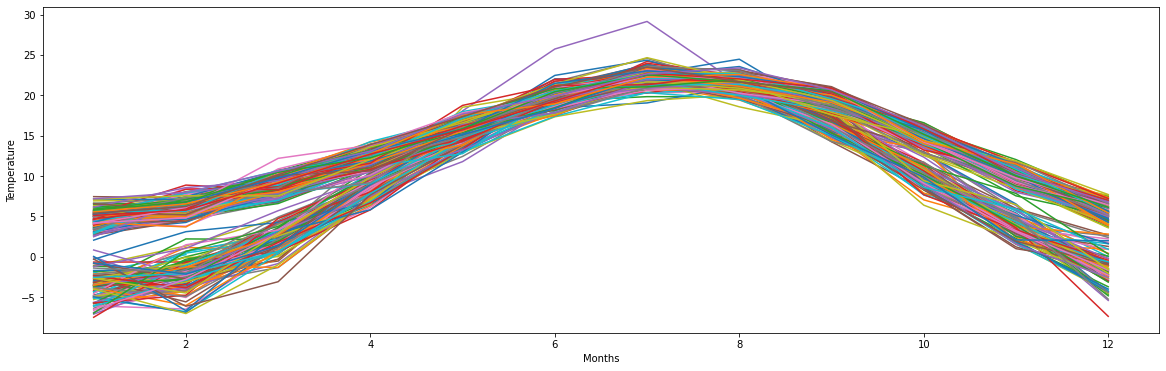

In [60]:
pivot.plot(figsize=(20,6))
plt.legend().remove()
plt.xlabel('Months')
plt.ylabel('Temperature')

#### We found some kind of seasonality in the data.

<AxesSubplot:xlabel='month'>

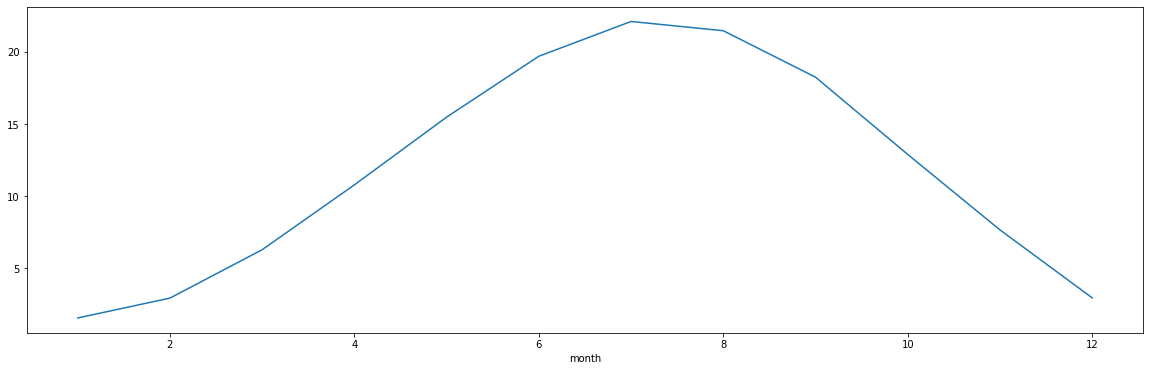

In [61]:
monthly_seasonality=pivot.mean(axis=1)
monthly_seasonality.plot(figsize=(20,6))

# Build time series 



## Using moving average

In [62]:
df.head()

,Temp,First_temp_diff
Date,,
1849-01-01,8.819,NaN
1849-02-01,9.577,NaN
1849-03-01,11.814,NaN
1849-04-01,13.704,NaN
1849-05-01,14.834,NaN


In [63]:
df=df[['First_temp_diff']]
df.dropna(inplace=True)

In [64]:
df.head()

,First_temp_diff
Date,
1850-01-01,-1.732
1850-02-01,-1.002
1850-03-01,-1.449
1850-04-01,0.031
1850-05-01,1.799


In [65]:
df['First_temp_diff'].rolling(window=5).mean()

Date
1850-01-01       NaN
1850-02-01       NaN
1850-03-01       NaN
1850-04-01       NaN
1850-05-01   -0.4706
               ...  
2013-05-01    0.4336
2013-06-01    1.0236
2013-07-01    1.4060
2013-08-01    0.8454
2013-09-01    0.7614
Name: First_temp_diff, Length: 7061, dtype: float64

In [66]:
value=pd.DataFrame(df['First_temp_diff'])

In [67]:
temp_df=pd.concat([value,df['First_temp_diff'].rolling(window=5).mean()],axis=1)

In [68]:
temp_df.columns=['actual_temp','forecast_temp']
temp_df.head()

,actual_temp,forecast_temp
Date,,
1850-01-01,-1.732,NaN
1850-02-01,-1.002,NaN
1850-03-01,-1.449,NaN
1850-04-01,0.031,NaN
1850-05-01,1.799,-0.4706


In [69]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
np.sqrt(mean_squared_error(temp_df['forecast_temp'][4:],temp_df['actual_temp'][4:]))

2.3934235122562058

## Using ARIMA




#### ARIMA stands for Autoregressive Integrated Moving Average. It is a combination of two models which are autoregressive and moving average.
#### ARIMA Model has three parameters:
#####  p: it is the number of autoregressive lags.
#####  d: it is the order of differencing required to make the series stationary.
#####  q: it is the number of moving average lags.

In [70]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

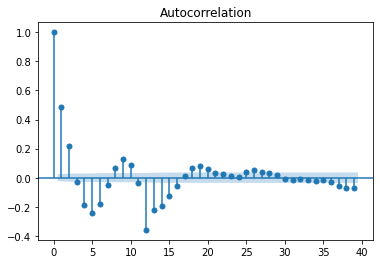

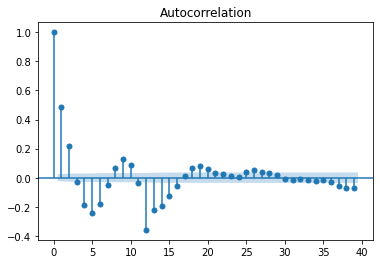

In [71]:
plot_acf(df['First_temp_diff'].dropna())

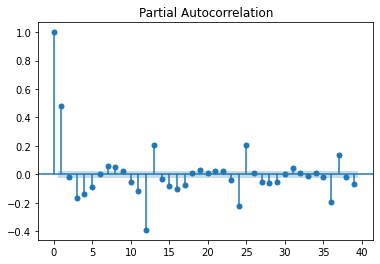

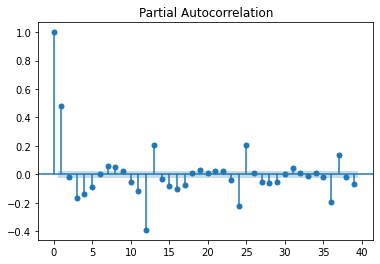

In [72]:
plot_pacf(df['First_temp_diff'].dropna())

In [73]:
df.isna().sum()

First_temp_diff    0
dtype: int64

In [74]:
#training data
training_data=df[0:6000]
test_data = df[6000:]

In [75]:
from statsmodels.tsa.arima_model import ARIMA

In [76]:
arima = ARIMA(training_data,order=(2,1,3))

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:587: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.



In [77]:
#fit the model
model= arima.fit()

In [78]:
#predictions 
predictions=model.forecast(steps=len(test_data))[0]
predictions

array([-0.19465249, -0.37665404, -0.34352086, ...,  0.03842549,
        0.03843563,  0.03844577])

In [79]:
np.sqrt(mean_squared_error(test_data,predictions))

1.5119905349319178

So,We get a very less error in our prediction.